<a href="https://colab.research.google.com/github/asif10101-dev/Dsp-Final-Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the data from csv file placed locally in our pc
df = pd.read_csv('/content/walmart sales dataset of 45 stores.csv')

# New section

In [ ]:
# print the first 5 rows of the dataframe
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.shape

(6435, 8)

In [ ]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 61.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=2a6d6003eea9ce367c4ff979d87f0b7031680fa290423d0bc1c22b3eff63ffc4
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
import pandas as pd
import ydata_profiling as yd
import os

# Load the data
data = pd.read_csv('/content/walmart sales dataset of 45 stores.csv')

# Create the profile report
profile = yd.ProfileReport(data)

# Define the directory and file path
output_dir = './content/sample_data'
output_file = os.path.join(output_dir, 'result.html')

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save the profile report to the specified file
profile.to_file(output_file)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

***`Data Preparation`***

---



In [ ]:
df_new = df.drop(["Date", "Store"], axis=1)
df_new.sample(3)

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
3632,946614.55,0,28.13,3.600,133.736143,7.907
5649,977103.64,0,62.59,3.851,135.265267,4.781
740,1532308.78,0,81.37,2.640,212.894485,6.973


In [ ]:
X = df_new.drop("Weekly_Sales", axis=1)
y = df_new["Weekly_Sales"]

X.shape , y.shape

((6435, 5), (6435,))

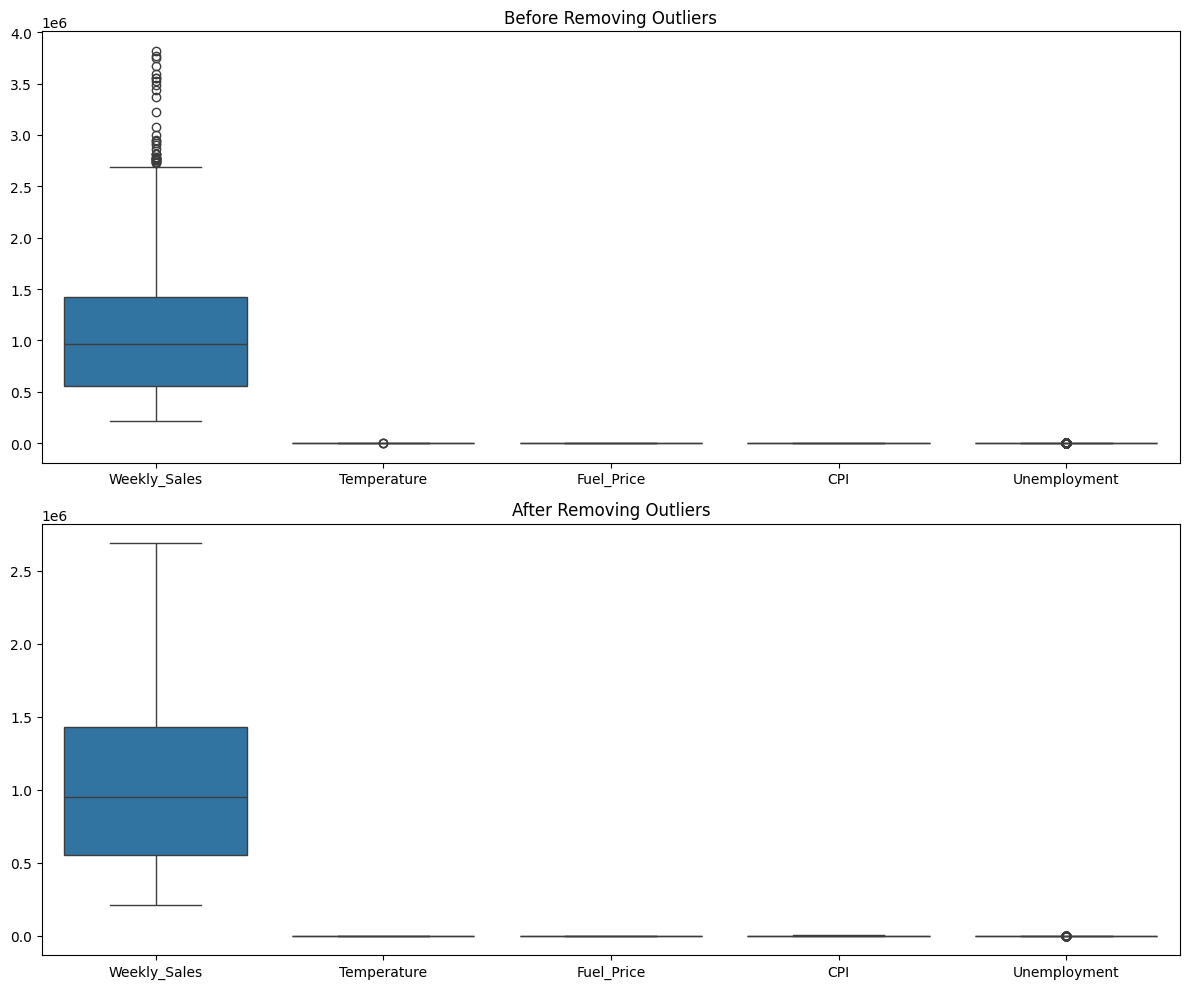

In [ ]:
# Selecting numerical columns for outlier detection
num_cols = ["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]
df_numeric = df[num_cols]

# Compute IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outlier_condition = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))
outliers = df_numeric[outlier_condition.any(axis=1)]

# Remove outliers
df_clean = df_numeric[~outlier_condition.any(axis=1)]

# Visualization - Boxplot before and after removing outliers
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Before removing outliers
sns.boxplot(data=df_numeric, ax=axes[0])
axes[0].set_title("Before Removing Outliers")

# After removing outliers
sns.boxplot(data=df_clean, ax=axes[1])
axes[1].set_title("After Removing Outliers")

plt.tight_layout()
plt.show()

In [ ]:
# Normalization the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X.shape

(6435, 5)

In [ ]:
df_new.head(3)

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1643690.90,0,42.31,2.572,211.096358,8.106
1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1611968.17,0,39.93,2.514,211.289143,8.106


In [ ]:
# Splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((1287, 5), (5148, 5), (1287,), (5148,))

In [ ]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBoost regressor with a fixed random state for reproducibility
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

# Train the model on the training dataset
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance using Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 252946048644.6841
R-squared (R²): 0.2148


In [ ]:
def predict_sales(Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment):
    # Create a NumPy array with the input features
    input_data = np.array([[Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]])

    # Scale the input data using the same scaler used for training
    scaled_input = scaler.transform(input_data)

    # Make the prediction using the trained model
    predicted_sales = model.predict(scaled_input)

    return predicted_sales[0]

# Example usage:
Holiday_Flag = int(input("Enter Holiday Flag (0 or 1): "))
Temperature = float(input("Enter Temperature: "))
Fuel_Price = float(input("Enter Fuel Price: "))
CPI = float(input("Enter CPI: "))
Unemployment = float(input("Enter Unemployment Rate: "))

predicted_sales = predict_sales(Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment)
print(f"Predicted Weekly Sales: {predicted_sales:.2f}")


In [ ]:
import pickle

# Save the model to a file
with open("xgboost_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully as 'xgboost_model.pkl'")


Model saved successfully as 'xgboost_model.pkl'


In [ ]:
from google.colab import files

# Download the file
files.download("xgboost_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

***END***